<a href="https://colab.research.google.com/github/sidh26/ANN/blob/main/classwork/Class1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def load_data():
    URL='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    data = pd.read_csv(URL, header = None)
    print(set(data[4]))

    # make the dataset linearly separable
    data = data[:100]
    data[4] = np.where(data.iloc[:, -1]=='Iris-setosa', 0, 1)
    data = np.asmatrix(data, dtype = 'float64')
    return data
data = load_data()

{'Iris-setosa', 'Iris-virginica', 'Iris-versicolor'}


In [33]:
features = data[:,:-1]
labels = data[:,-1]

In [9]:
w=np.zeros(shape=(1,features.shape[1]+1))
print(features.shape, w.shape)

(100, 4) (1, 5)


In [34]:
for x, label in zip(features,labels):
    print(label)

[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]


In [10]:
misclassified_e = []
num_iters = 5
lr = 0.9

for e in range(num_iters):
    misclassified=0
    
    for x, label in zip(features,labels):
        x = np.insert(x,0,1)
        y = np.dot(w,x.transpose())
        target = 1.0 if (y>0) else 0.0
        delta = (label.item(0, 0) - target)

        if delta:
            misclassified += 1
            w += lr*(delta*x)
    misclassified_e.append(misclassified)
    

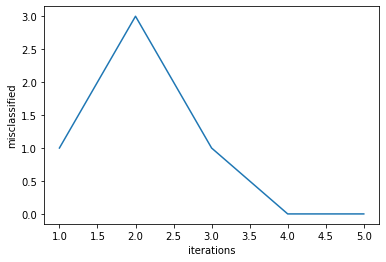

In [14]:
epochs = np.arange(1, num_iters+1)
plt.plot(epochs, misclassified_e)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.show()

[1, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


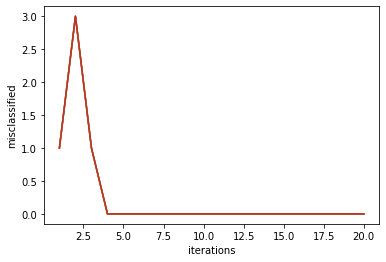

In [29]:
lrs = [0.1, 0.4, 0.8, 1]
epochs = np.arange(1, num_iters+1)
for lr in lrs:
    w = np.zeros(shape=(1, features.shape[1]+1))
    # print(features.shape, w.shape)
    misclassified_e = []
    num_iters = 20
    # lr = 0.9

    for e in range(num_iters):
        misclassified=0
        
        for x, label in zip(features, labels):
            x = np.insert(x, 0, 1)
            y = np.dot(w, x.transpose())
            target = 1.0 if (y>0) else 0.0
            delta = (label.item(0, 0) - target)

            if delta:
                misclassified += 1
                w += lr*(delta*x)
        misclassified_e.append(misclassified)
    print(misclassified_e)
    plt.plot(epochs, misclassified_e)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.show()

In [36]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, Y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# summarize the dataset
print(X.shape, Y.shape)

(1000, 10) (1000,)


In [37]:
features = X
labels = Y

[188, 172, 176, 174, 170, 174, 172, 161, 178, 172, 178, 170, 170, 167, 163, 170, 175, 164, 171, 173]


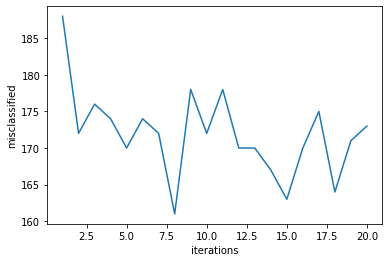

In [45]:
lrs = [0.1, 0.4, 0.8, 1]
lr = 0.85
num_iters = 20
epochs = np.arange(1, num_iters+1)
w = np.zeros(shape=(1, features.shape[1]+1))
# print(features.shape, w.shape)
misclassified_e = []
for e in range(num_iters):
    misclassified=0
    
    for x, label in zip(features, labels):
        x = np.insert(x, 0, 1)
        y = np.dot(w, x.transpose())
        target = 1.0 if (y>0) else 0.0
        delta = (label.item(0) - target)

        if delta:
            misclassified += 1
            w += lr*(delta*x)
    misclassified_e.append(misclassified)
print(misclassified_e)
plt.plot(epochs, misclassified_e)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.show()

In [48]:
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron

X, Y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)

model = Perceptron()

model.fit(X,Y)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [49]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, Y, scoring='accuracy', cv=5, n_jobs=-1)
print('Mean Accuracy: ', np.mean(scores))

Mean Accuracy:  0.836


In [52]:
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
X, Y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)

model = Perceptron()

model.fit(X,Y)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

grid = dict()
grid['eta0'] = [0.0001, 0.001, 0.01, 0.1, 1]
grid['max_iter'] = [10, 50, 100, 250]

search = GridSearchCV(model, grid, scoring='accuracy', cv=5, n_jobs=-1)
results = search.fit(X,Y)

print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print('>%.3f with: %r' %(mean, param))


Mean Accuracy: 0.840
Config: {'eta0': 0.0001, 'max_iter': 10}
>0.840 with: {'eta0': 0.0001, 'max_iter': 10}
>0.840 with: {'eta0': 0.0001, 'max_iter': 50}
>0.840 with: {'eta0': 0.0001, 'max_iter': 100}
>0.840 with: {'eta0': 0.0001, 'max_iter': 250}
>0.840 with: {'eta0': 0.001, 'max_iter': 10}
>0.840 with: {'eta0': 0.001, 'max_iter': 50}
>0.840 with: {'eta0': 0.001, 'max_iter': 100}
>0.840 with: {'eta0': 0.001, 'max_iter': 250}
>0.835 with: {'eta0': 0.01, 'max_iter': 10}
>0.835 with: {'eta0': 0.01, 'max_iter': 50}
>0.835 with: {'eta0': 0.01, 'max_iter': 100}
>0.835 with: {'eta0': 0.01, 'max_iter': 250}
>0.838 with: {'eta0': 0.1, 'max_iter': 10}
>0.836 with: {'eta0': 0.1, 'max_iter': 50}
>0.836 with: {'eta0': 0.1, 'max_iter': 100}
>0.836 with: {'eta0': 0.1, 'max_iter': 250}
>0.838 with: {'eta0': 1, 'max_iter': 10}
>0.836 with: {'eta0': 1, 'max_iter': 50}
>0.836 with: {'eta0': 1, 'max_iter': 100}
>0.836 with: {'eta0': 1, 'max_iter': 250}
